# Loki2 Cell Type Inference

This notebook demonstrates how to perform cell type inference using Loki2 on whole slide images (WSI).

## Data Requirements

The Loki2 model checkpoint is stored in the directory `../model_ckpt/`, which will be released on GitHub and Hugging Face after the manuscript is accepted. \
The example data is stored in the directory `../data/cell_infer`, which can be donwloaded from [Google Drive](https://drive.google.com/drive/folders/19qzd8jTZBQ57a3N5xbiZFSGZJNpIz8NQ?usp=sharing).

You will need:
- Loki2 model checkpoint
- Example WSI data

## Cell Detection

This section runs Loki2 to detect and segment cells from whole slide images. The model performs automatic cell segmentation and detection from high-resolution WSIs, generating morphological embeddings that capture cell characteristics.

```bash
MODEL="../model_ckpt/loki2_checkpoint.pth"
OUTDIR="../outputs/cell_infer"
mkdir -p "$OUTDIR"

FILE="../data/cell_infer/colon_cancer_sample.tif"
WSI_PROPERTIES='{"slide_mpp": 0.25, "magnification": 40}'

echo "Processing ${FILE}"
python ../src/loki2/detect_cells.py \
  --model "$MODEL" \
  --outdir "$OUTDIR" \
  --geojson \
  --graph \
  process_wsi \
  --wsi_path "$FILE" \
  --wsi_properties "$WSI_PROPERTIES"
```

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import loki2.preprocess
import loki2.plot

## Load Sample

After cell detection, we load the sample data including cell embeddings, spatial positions, and cell type annotations. The embeddings capture morphological features of each detected cell.

In [2]:
base = '../outputs/cell_infer'

In [3]:
sample_name = 'colon_cancer_sample'

In [4]:
Image.MAX_IMAGE_PIXELS = None  # <-- allow very large WSIs
# Load the image
img = Image.open(f"../data/cell_infer/{sample_name}.tif")

In [5]:
emb, pos, cells = loki2.preprocess.load_sample(base, sample_name)

## Plot Image

Visualize the original whole slide image to see the tissue structure before analyzing cell type distributions.

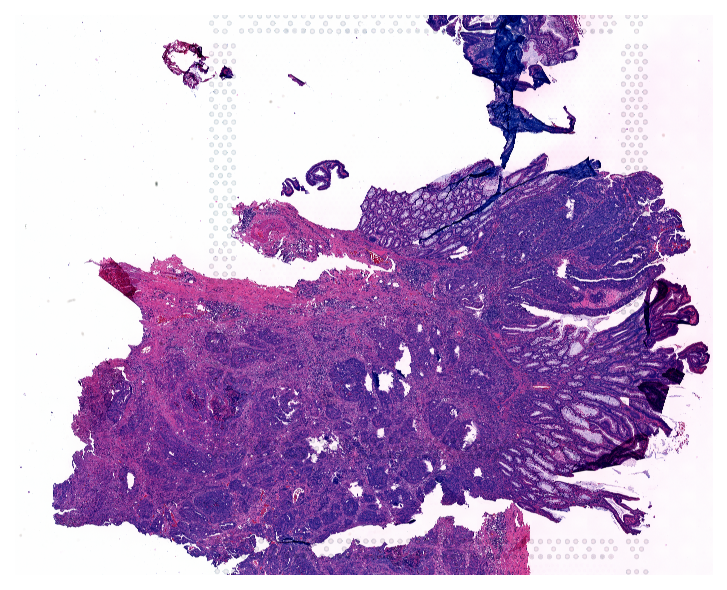

In [6]:
plt.figure(figsize=(6, 6), dpi=150)
plt.imshow(img)
plt.axis('off')
plt.show()

## Plot Cell Types

Visualize the inferred cell types mapped onto the spatial tissue coordinates. This spatial visualization shows the distribution of different cell types across the tissue, revealing the spatial organization of cellular populations.

Total cells: 321549


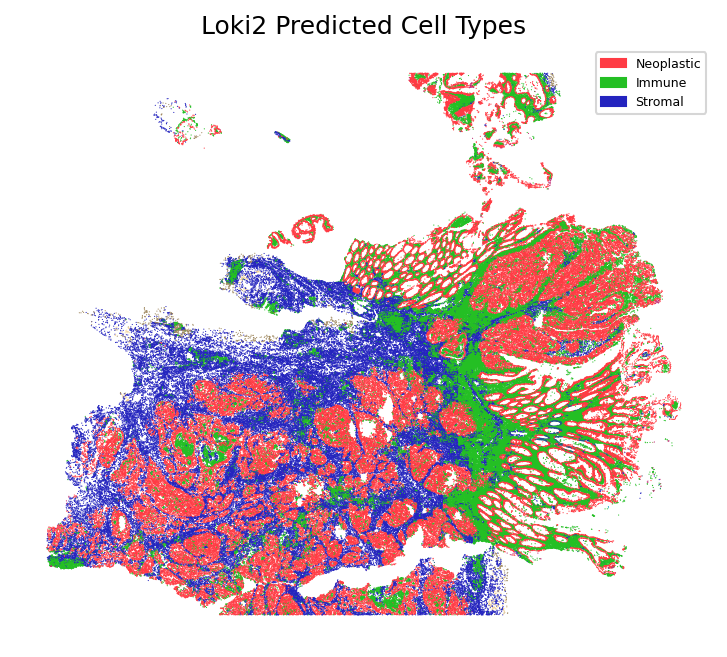

In [7]:
loki2.plot.plot_cell_types(pos, cells, 0.3)

## Plot UMAP

Apply dimensionality reduction using UMAP to visualize cell embeddings in a 2D space. The UMAP visualization reveals the similarity structure of cells based on their morphological embeddings, with similar cells clustering together. The colors are then mapped back to the spatial coordinates to show how morphological similarity relates to spatial organization.

In [8]:
umap_hex = loki2.plot.embeddings_to_hex(emb, method='umap')

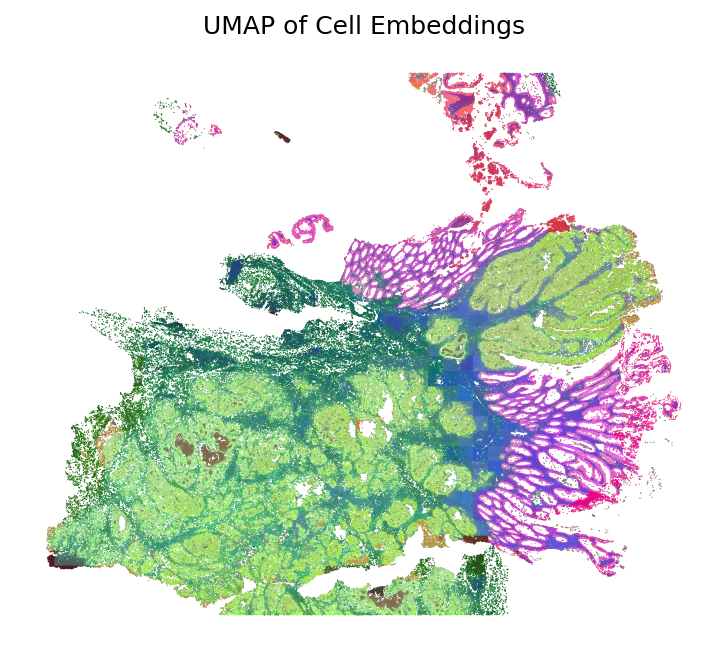

In [9]:
plt.figure(figsize=(6, 6), dpi=150)
plt.scatter(pos[:,0], pos[:,1], s=0.3, c=umap_hex, edgecolors='none', linewidths=0)
plt.gca().set_aspect('equal')
plt.gca().invert_yaxis()
plt.axis("off")
plt.title("UMAP of Cell Embeddings")
plt.show()